**dividing the dataset into 99-1 train test split** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df = pd.read_csv(path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [10]:
target = ['GLD']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

split_index = int(len(X_scaled) * 0.98)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R² Score: 0.5802
Mean Squared Error: 0.0005


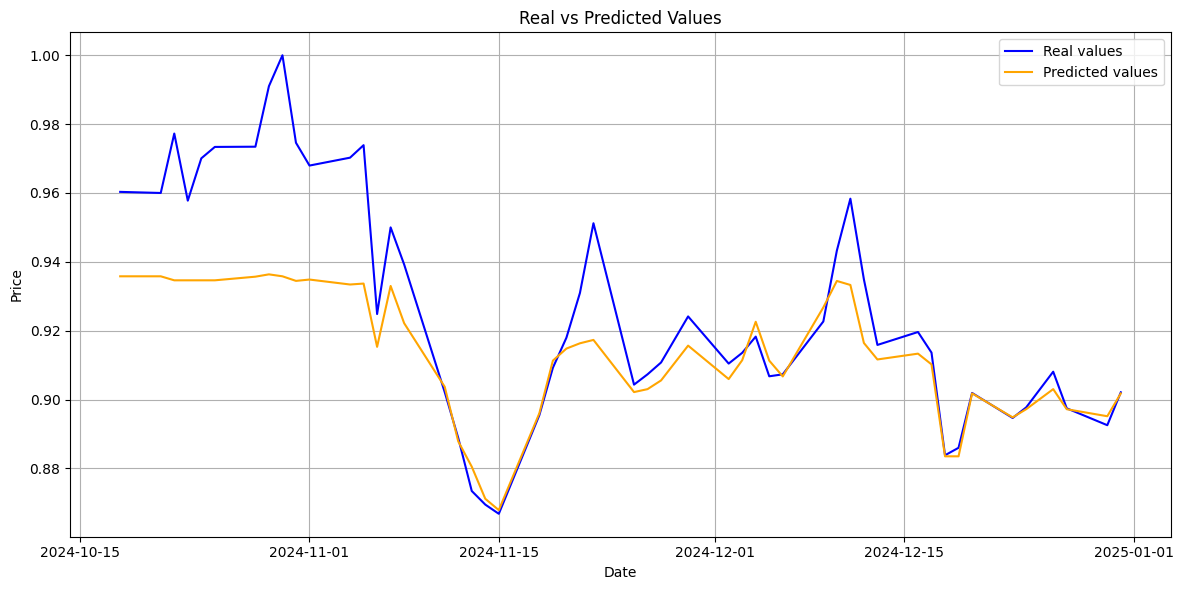

In [11]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()